In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('/content/drive/MyDrive/EDGEPRO/project 1 data.csv')

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


###Null Value Checking

In [4]:
data.isnull().any().sum()

1

In [5]:
data.duplicated().any().sum()

1

In [6]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

###Removing Null and duplicates


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().any().sum()

0

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().any().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    535187 non-null  object 
 1   StockCode    535187 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     535187 non-null  int64  
 4   InvoiceDate  535187 non-null  object 
 5   UnitPrice    535187 non-null  float64
 6   CustomerID   535187 non-null  int64  
 7   Country      535187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 36.7+ MB


In [12]:
print(data.shape)

(535187, 8)


In [13]:
data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

In [14]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


###1. Total Revenue Calculation: What is the total revenue generated from the sales in this dataset?


In [15]:
print("Total Revenue: ",data.Total_Revenue.sum())


Total Revenue:  9726006.954


to

###:2. Top Customers: Who are the top 10 customers in terms of total revenue?


In [16]:
customer_revenue = data.groupby('CustomerID')['Total_Revenue'].sum().nlargest(10)

In [17]:
customer_revenue

CustomerID
15287    1447972.77
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
Name: Total_Revenue, dtype: float64

###3. Sales by Country: What are the total sales per country?

In [18]:
sales_by_country = data.groupby('Country')['Quantity'].sum().reset_index()

# Display the total sales by country
print(sales_by_country)

                 Country  Quantity
0              Australia     83643
1                Austria      4827
2                Bahrain       260
3                Belgium     23152
4                 Brazil       356
5                 Canada      2763
6        Channel Islands      9473
7                 Cyprus      6296
8         Czech Republic       592
9                Denmark      8188
10                  EIRE    142495
11    European Community       497
12               Finland     10666
13                France    110438
14               Germany    117341
15                Greece      1556
16             Hong Kong      4709
17               Iceland      2458
18                Israel      4350
19                 Italy      7999
20                 Japan     25218
21               Lebanon       386
22             Lithuania       652
23                 Malta       944
24           Netherlands    200128
25                Norway     19247
26                Poland      3653
27              Port

###4. Monthly Sales Trends: How do sales trends vary on a monthly basis?

In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract year and month from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

# Ensure the 'Total_Revenue' column is present and correctly calculated
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Group by Year and Month and sum the Total Revenue
monthly_sales = data.groupby(['Year', 'Month'])['Total_Revenue'].sum().reset_index()

# Display the monthly sales trends
print(monthly_sales)

    Year  Month  Total_Revenue
0   2010     12     746723.610
1   2011      1     558448.560
2   2011      2     497026.410
3   2011      3     682013.980
4   2011      4     492367.841
5   2011      5     722094.100
6   2011      6     689977.230
7   2011      7     680156.991
8   2011      8     681386.460
9   2011      9    1017596.682
10  2011     10    1069368.230
11  2011     11    1456145.800
12  2011     12     432701.060


###5. Most Popular Products: What are the top 10 best-selling products by quantity?


In [20]:
# Group by StockCode and Description and sum the Quantity
product_sales = data.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort by Quantity in descending order and get the top 10 products
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Display the top 10 best-selling products
print(top_products)

     StockCode                         Description  Quantity
3617     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
4197    85099B             JUMBO BAG RED RETROSPOT     47260
1333     22197                      POPCORN HOLDER     36322
3956     84879       ASSORTED COLOUR BIRD ORNAMENT     36282
531      21212     PACK OF 72 RETROSPOT CAKE CASES     36016
4223    85123A  WHITE HANGING HEART T-LIGHT HOLDER     35006
2344     23084                  RABBIT NIGHT LIGHT     30631
1630     22492             MINI PAINT SET VINTAGE      26437
1775     22616          PACK OF 12 LONDON TISSUES      26299
1122     21977  PACK OF 60 PINK PAISLEY CAKE CASES     24719


###:6. Average Order Value: What is the average order value for each customer?

In [21]:

average_order = data.groupby('CustomerID')['Total_Revenue'].mean()

average_order

CustomerID
12346     0.000000
12347    23.681319
12348    57.975484
12349    24.076027
12350    19.670588
           ...    
18280    18.060000
18281    11.545714
18282    13.584615
18283     2.837074
18287    26.246857
Name: Total_Revenue, Length: 4372, dtype: float64

###7. Frequent Buyers: Which customers made the most frequent purchases?

In [22]:

# Ensure InvoiceNo is treated as a unique order
unique_orders = data[['InvoiceNo', 'CustomerID']]

# Group by CustomerID and calculate the number of orders for each customer
customer_orders = unique_orders.groupby('CustomerID').size().reset_index(name='Number_of_Orders')

# Sort customers by the number of orders in descending order
top_customers = customer_orders.sort_values(by='Number_of_Orders', ascending=False)

# Display the top customers by number of orders
print(top_customers)

      CustomerID  Number_of_Orders
2175       15287            133604
4042       17841              7812
1895       14911              5898
1300       14096              5128
330        12748              4459
...          ...               ...
2938       16323                 1
727        13302                 1
3020       16428                 1
704        13270                 1
730        13307                 1

[4372 rows x 2 columns]


In [23]:
unique_orders = data[['InvoiceNo', 'CustomerID']]

# Group by CustomerID and calculate the number of orders for each customer
customer_orders = unique_orders.groupby('CustomerID').size().reset_index(name='Number_of_Orders')

# Sort customers by the number of orders in descending order
top_customer = customer_orders.sort_values(by='Number_of_Orders', ascending=False).head(1)

# Display the top customer by number of orders
print(top_customer)

      CustomerID  Number_of_Orders
2175       15287            133604


### 8. Sales on Weekdays vs. Weekends: How do sales compare between weekdays and weekends?

In [24]:

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract day of the week (Monday=0, Sunday=6)
data['Day_of_Week'] = data['InvoiceDate'].dt.dayofweek

# Map day of the week to weekend or weekday
data['Day_Type'] = data['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by day type and calculate total sales
sales_comparison = data.groupby('Day_Type')['Total_Revenue'].sum()

# Display the sales comparison
print(sales_comparison)

Day_Type
Weekday    8927347.493
Weekend     798659.461
Name: Total_Revenue, dtype: float64


### 9. Repeat Purchase Rate: What percentage of customers made repeat purchases?

In [25]:
data['CustomerID'].duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Name: CustomerID, Length: 535187, dtype: bool

In [26]:
# Ensure InvoiceNo is treated as a unique order
unique_orders = data[['InvoiceNo', 'CustomerID']]

# Group by CustomerID and calculate the number of orders for each customer
customer_orders = unique_orders.groupby('CustomerID').size().reset_index(name='Number_of_Orders')

# Count the number of customers with repeat purchases
repeat_customers = (customer_orders['Number_of_Orders'] > 1).sum()

# Calculate the percentage of repeat customers
total_customers = customer_orders.shape[0]
percentage_repeat_customers = (repeat_customers / total_customers) * 100

# Display the percentage of repeat customers
print("Percentage of customers who made repeat purchases: {:.2f}%".format(percentage_repeat_customers))


Percentage of customers who made repeat purchases: 98.19%


###:10.High-Value Orders: What are the highest-value orders in the dataset?

In [27]:
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Group by InvoiceNo and calculate total revenue per order
order_revenue = data.groupby('InvoiceNo')['Total_Revenue'].sum().reset_index()

# Sort orders by total revenue in descending order
highest_value_orders = order_revenue.sort_values(by='Total_Revenue', ascending=False)

# Display the highest-value orders
print(highest_value_orders.head())

      InvoiceNo  Total_Revenue
20571    581483      168469.60
2142     541431       77183.60
17403    574941       52940.94
18083    576365       50653.91
8876     556444       38970.00


###Visualization Question and Answer


###1. Revenue Over Time: Create a line chart showing total monthly revenue.

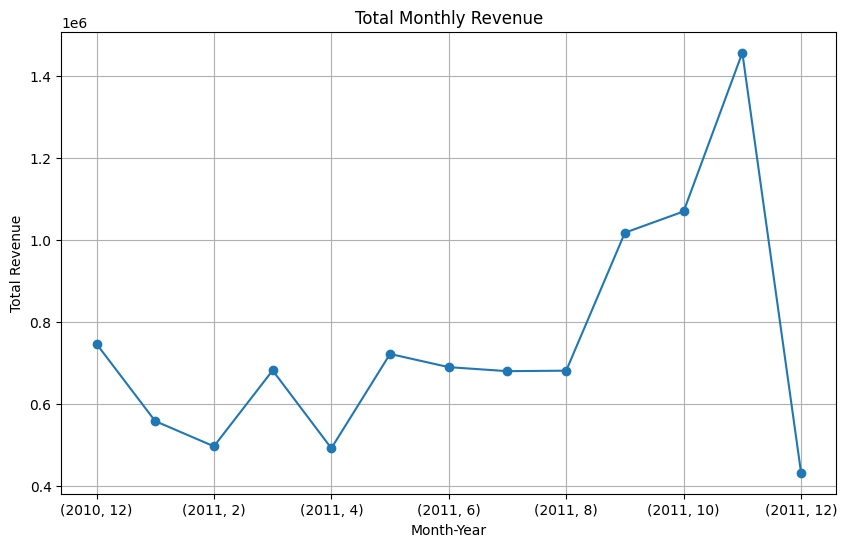

In [28]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Ensure Total Revenue is calculated
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Group by year and month and calculate total monthly revenue
monthly_revenue = data.groupby([data['InvoiceDate'].dt.year, data['InvoiceDate'].dt.month])['Total_Revenue'].sum()

# Plot the line chart
monthly_revenue.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total Monthly Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

###2. Sales Distribution by Country: Create a bar chart showing sales distribution across different countries.


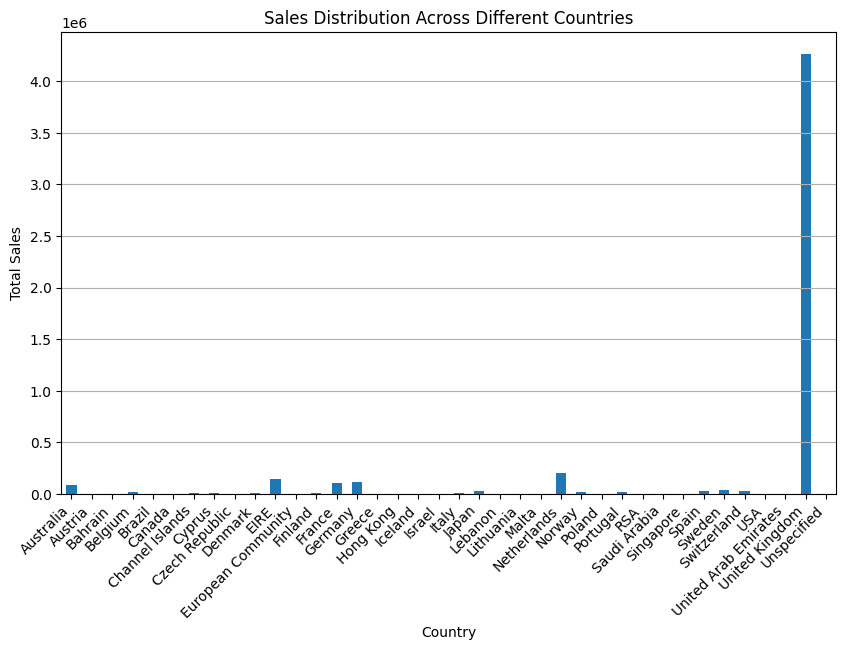

In [29]:
country_sales = data.groupby('Country')['Quantity'].sum()

# Plot the bar chart
country_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Distribution Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

###3. Top Products by Sales: Create a bar chart for the top 10 best-selling products.

In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue,Year,Month,Day_of_Week,Day_Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2,Weekday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2,Weekday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday


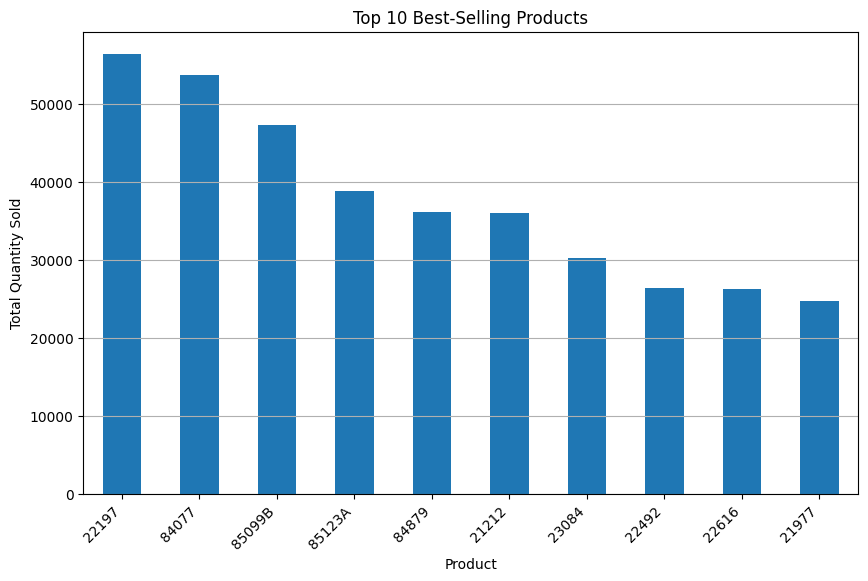

In [31]:
product_sales = data.groupby('StockCode')['Quantity'].sum()

# Select the top 10 best-selling products
top_10_products = product_sales.nlargest(10)

# Plot the bar chart
top_10_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

###4. Customer Segmentation: Create a scatter plot showing customer segmentation based on their total revenue and frequency of purchases.

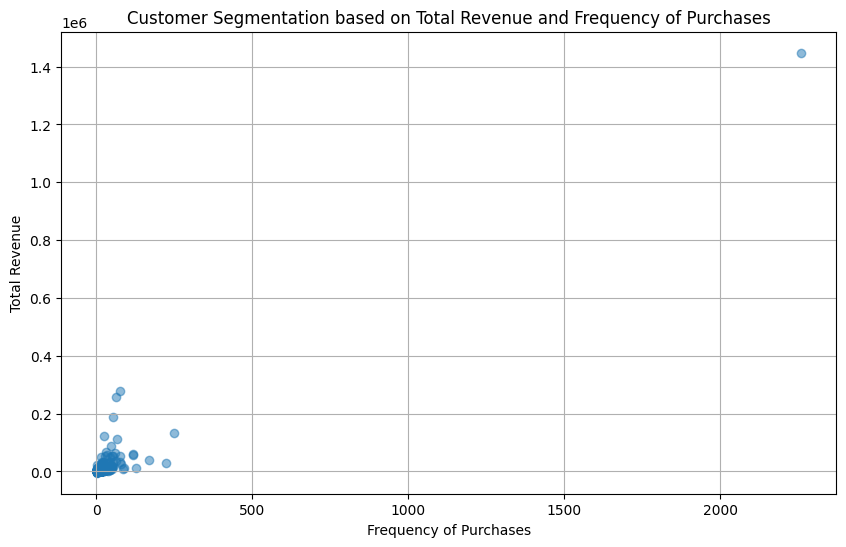

In [32]:
customer_data = data.groupby('CustomerID').agg({'Total_Revenue': 'sum', 'InvoiceNo': 'nunique'}).reset_index()
customer_data.columns = ['CustomerID', 'Total_Revenue', 'Frequency']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['Frequency'], customer_data['Total_Revenue'], alpha=0.5)
plt.title('Customer Segmentation based on Total Revenue and Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

###: 5. Sales Heatmap: Create a heatmap showing sales by day of the week and time of day.


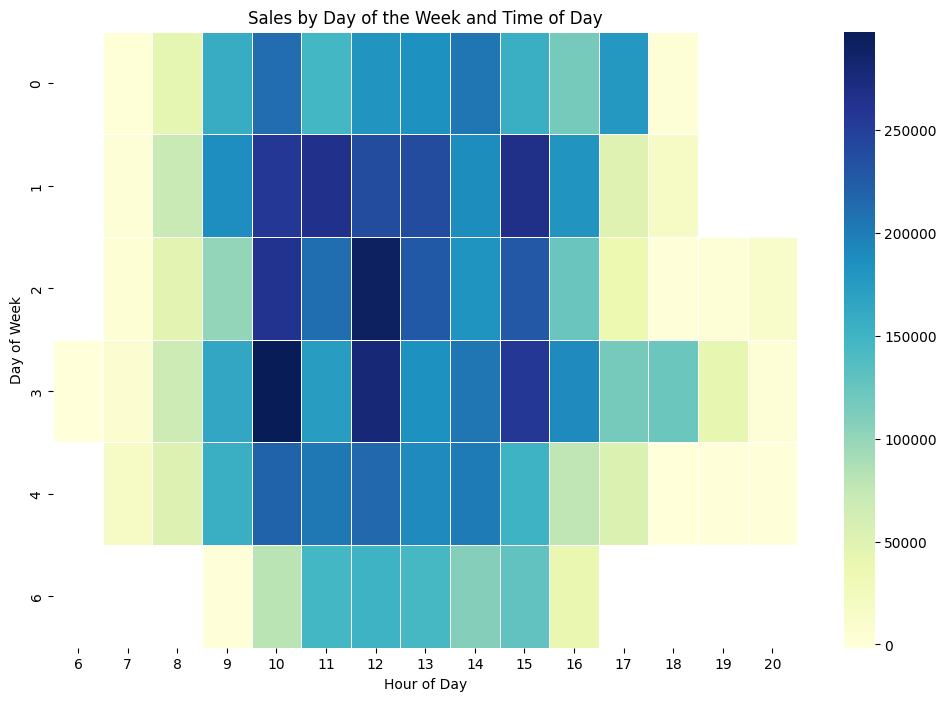

In [33]:
import seaborn as sns
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Ensure Total Revenue is calculated
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Extract Day of the Week and Hour of the Day
data['Day_of_Week'] = data['InvoiceDate'].dt.dayofweek
data['Hour_of_Day'] = data['InvoiceDate'].dt.hour

# Group by Day of the Week and Hour of the Day to calculate total sales
sales_heatmap_data = data.groupby(['Day_of_Week', 'Hour_of_Day'])['Total_Revenue'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Sales by Day of the Week and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

###6. Product Sales Trends: Create a line chart showing the sales trends of the top 5 products over time.

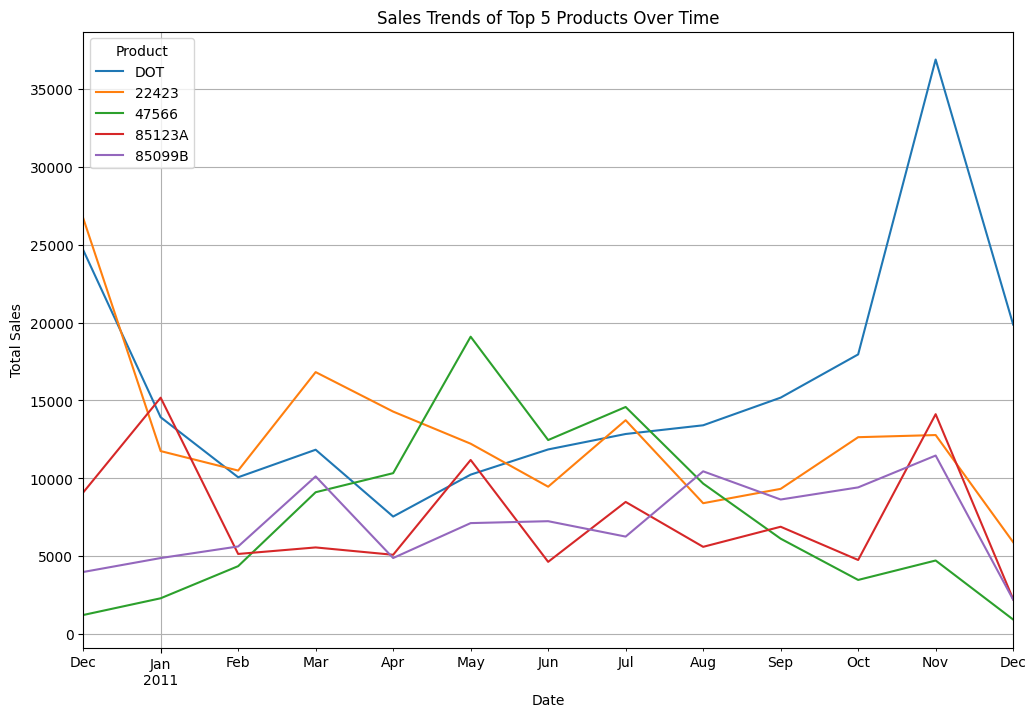

In [34]:
product_sales_over_time = data.groupby(['StockCode', pd.to_datetime(data['InvoiceDate']).dt.to_period('M')])['Total_Revenue'].sum().unstack(level=0)

# Select the top 5 best-selling products
top_5_products = product_sales_over_time.sum().nlargest(5).index
top_5_product_sales = product_sales_over_time[top_5_products]

# Plot the line chart
top_5_product_sales.plot(kind='line', figsize=(12, 8))
plt.title('Sales Trends of Top 5 Products Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.grid(True)
plt.show()

###7. Revenue Distribution: Create a histogram showing the distribution of order values.

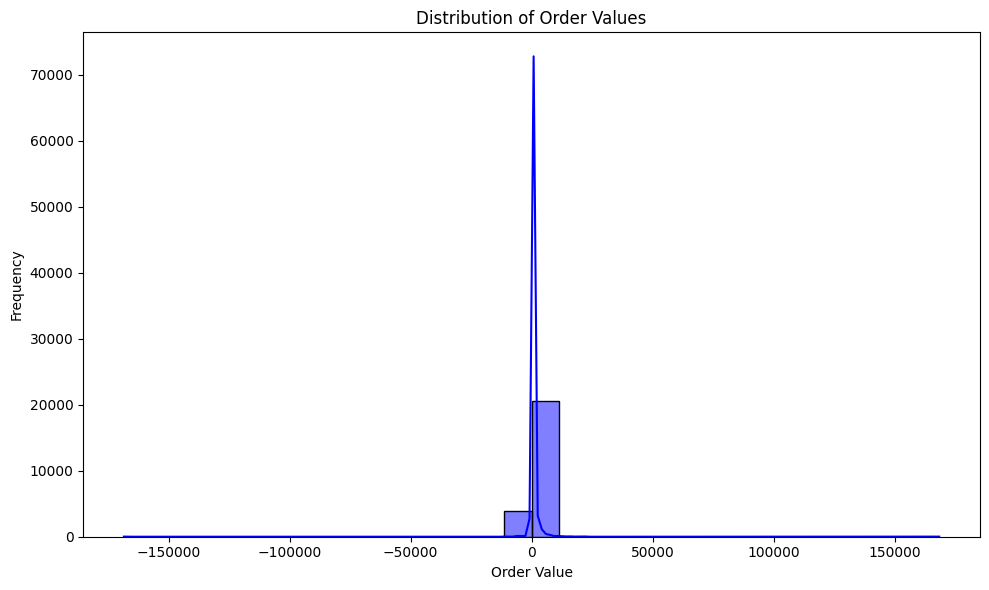

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 2: Calculate Order Values (sum of Total_Revenue for each InvoiceNo)
order_values = data.groupby('InvoiceNo')['Total_Revenue'].sum().reset_index()

# Step 3: Plot the Histogram
plt.figure(figsize=(10, 6))
sns.histplot(order_values['Total_Revenue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


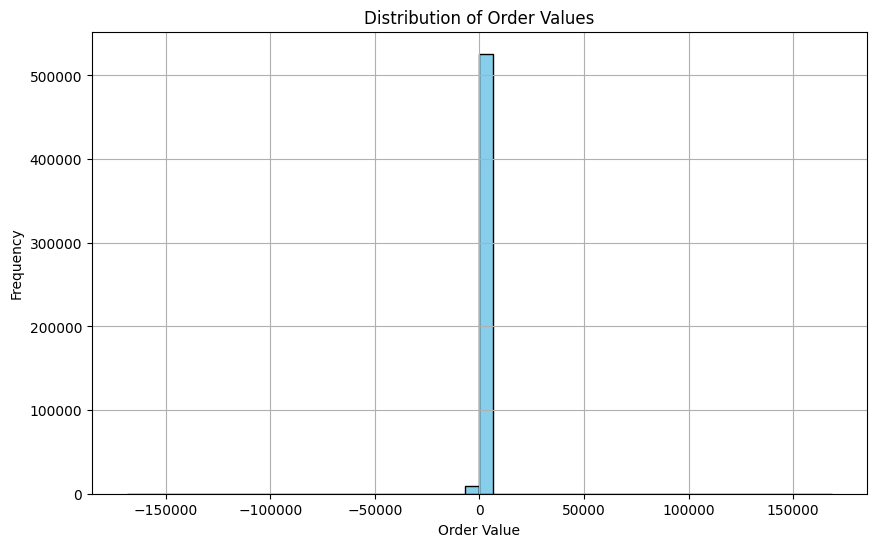

In [36]:

# Ensure Total Revenue is calculated
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Total_Revenue'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


###8. Top Customers: Create a bar chart for the top 10 customers by total revenue.



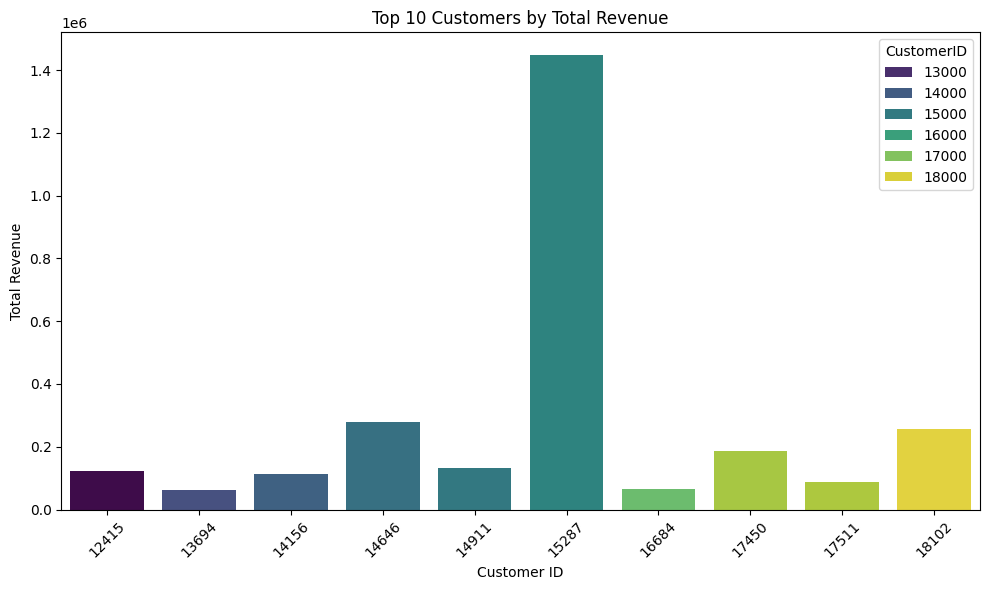

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV file
# df = pd.read_csv('your_file.csv')

# Step 2: Calculate Total Revenue per Customer
customer_revenue = data.groupby('CustomerID')['Total_Revenue'].sum().reset_index()

# Step 3: Select the Top 10 Customers
top_customers = customer_revenue.nlargest(10, 'Total_Revenue')

# Step 4: Plot the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='Total_Revenue', data=top_customers, palette='viridis',hue='CustomerID', dodge=False)
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###9. Sales Performance: Create a dashboard combining multiple visualizations (e.g.,revenue over time, top products, and sales by country)

In [38]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Step 2: Prepare the Data

# Revenue over time
revenue_over_time = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Total_Revenue'].sum().reset_index()
revenue_over_time['InvoiceDate'] = revenue_over_time['InvoiceDate'].dt.to_timestamp()

# Top products by total revenue
top_products = data.groupby('StockCode')['Total_Revenue'].sum().nlargest(10).reset_index()

# Sales by country
sales_by_country = data.groupby('Country')['Total_Revenue'].sum().reset_index()

# Step 3: Create Individual Visualizations

# Revenue over time
fig_revenue_time = go.Figure()
fig_revenue_time.add_trace(go.Scatter(x=revenue_over_time['InvoiceDate'], y=revenue_over_time['Total_Revenue'], mode='lines', name='Revenue Over Time'))

# Top products
fig_top_products = go.Figure()
fig_top_products.add_trace(go.Bar(x=top_products['StockCode'], y=top_products['Total_Revenue'], name='Top Products'))

# Sales by country
fig_sales_country = go.Figure()
fig_sales_country.add_trace(go.Bar(x=sales_by_country['Country'], y=sales_by_country['Total_Revenue'], name='Sales by Country'))

# Step 4: Combine Visualizations into a Dashboard
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Revenue Over Time", "Top Products by Revenue", "Sales by Country"),
    vertical_spacing=0.1
)

# Add traces to the subplots
fig.add_trace(fig_revenue_time['data'][0], row=1, col=1)
fig.add_trace(fig_top_products['data'][0], row=2, col=1)
fig.add_trace(fig_sales_country['data'][0], row=3, col=1)

# Update layout
fig.update_layout(
    height=1000, width=1200,
    title_text="Sales Performance Dashboard",
    showlegend=False
)

fig.show()


###10.Customer Lifetime Value: Create a box plot showing the distribution of customer lifetime values

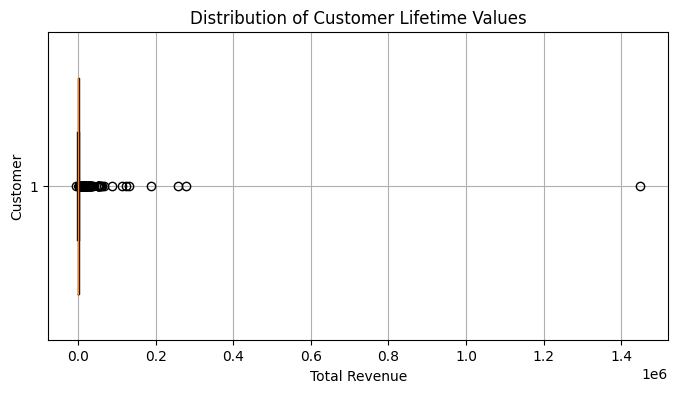

In [39]:

# Ensure Total Revenue is calculated
if 'Total_Revenue' not in data.columns:
    data['Total_Revenue'] = data['Quantity'] * data['UnitPrice']

# Group by CustomerID and calculate total revenue for each customer
clv_data = data.groupby('CustomerID')['Total_Revenue'].sum()

# Plot the box plot
plt.figure(figsize=(8, 4))
plt.boxplot(clv_data.values, vert=False, widths=0.7)
plt.title('Distribution of Customer Lifetime Values')
plt.xlabel('Total Revenue')
plt.ylabel('Customer')
plt.grid(True)
plt.show()


###11.Show correlation matrix

File not found. Please provide the correct file path.


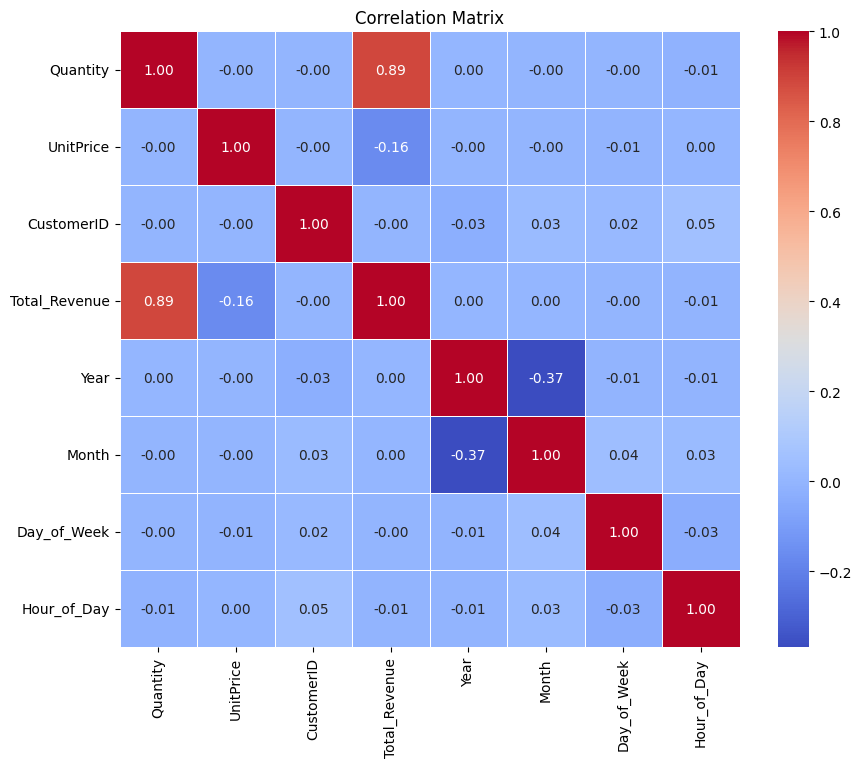

In [40]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
try:
    data = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check for missing values
if data.isnull().values.any():
    print("Dataset contains missing values. Please handle them before proceeding.")
    exit()

# Check data types
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
if len(numeric_columns) == 0:
    print("No numeric columns found in the dataset. Please ensure the dataset contains numeric data.")
    exit()

# Calculate correlation matrix
corr_matrix = data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [41]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue,Year,Month,Day_of_Week,Day_Type,Hour_of_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2,Weekday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2,Weekday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,Weekday,8
